In [ ]:
#clone repository
!git clone https://github.com/jaimesabalimperial/jaisalab.git
%cd jaisalab/ 

In [ ]:
# Install pip packages in the current Jupyter kernel
import sys
!{sys.executable} -m pip install -r env/requirements.txt

In [1]:
from jaisalab.evaluation.plotter import RLPlotter
from jaisalab.evaluation import Evaluator, SeedEvaluator
from jaisalab.utils.eval import get_snapshot_dirs

import numpy as np
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt

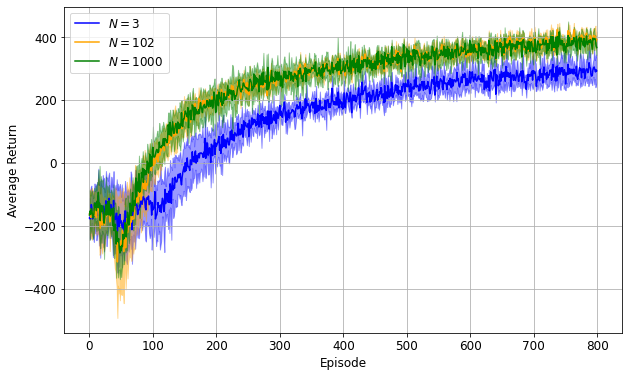

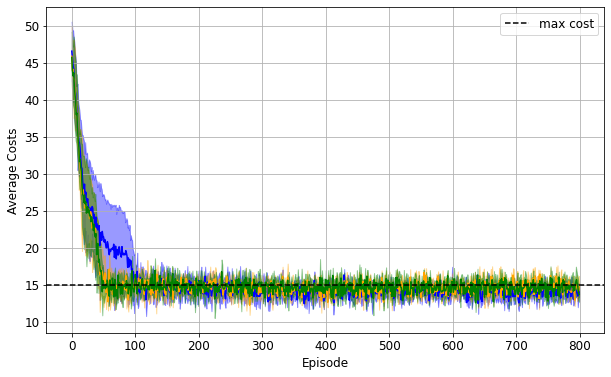

In [2]:
# N
N_fdirs = ['dcpo_N=3_backlog', 'dcpo_beta100.0_backlog', 'dcpo_N=1000_backlog']
N_labels = [r'$N = 3$', r'$N = 102$', r'$N = 1000$']
N_dirs = [f'experiments/data{i}/' for i in range(1,6)]

N_exp = {'fdir': N_fdirs, 'data_dir': N_dirs}

plotter = RLPlotter(**N_exp)
plotter.plot_returns(figsize=(10,6), fontsize=12, custom_labels=N_labels)
plotter.plot_costs(cost_lim=15, use_legend=False, figsize=(10,6), fontsize=12)

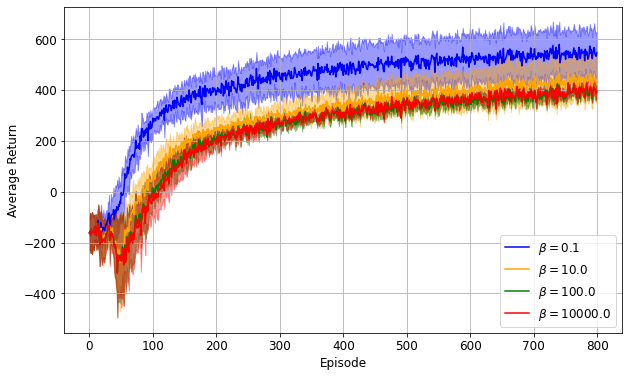

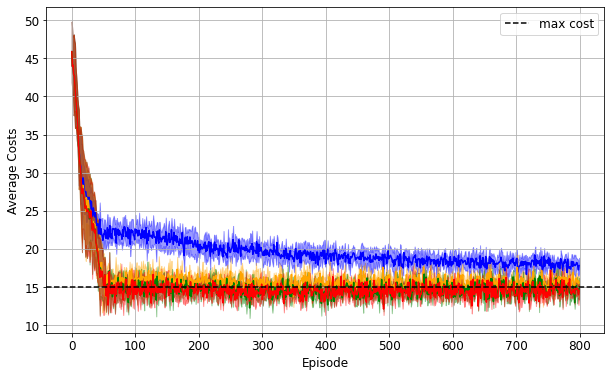

In [3]:
#beta 
beta_fdirs = [ 'dcpo_beta0.1_backlog','dcpo_beta10.0_backlog', 'dcpo_beta100.0_backlog', 'dcpo_beta10000.0_backlog']
beta_labels = [r'$\beta = 0.1$', r'$\beta = 10.0$', r'$\beta = 100.0$', r'$\beta = 10000.0$']
beta_dirs = [f'experiments/data{i}/' for i in range(1,6)]

beta_exp = {'fdir': beta_fdirs, 'data_dir': beta_dirs}
plotter = RLPlotter(**beta_exp)
plotter.plot_returns(figsize=(10,6), fontsize=12, custom_labels=beta_labels)
plotter.plot_costs(cost_lim=15, use_legend=False, figsize=(10,6), fontsize=12)

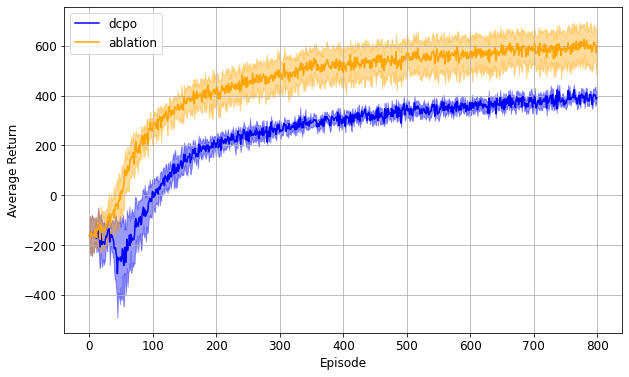

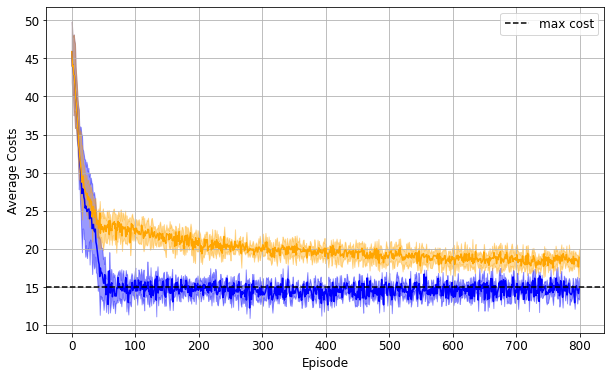

In [4]:
#ablation
ablation_fdirs = ['dcpo_beta100.0_backlog', 'dcpo_ablation_backlog']
ablation_labels = ['dcpo', 'ablation']
ablation_dirs = [f'experiments/data{i}/' for i in range(1,6)]

ablation_exp = {'fdir': ablation_fdirs, 'data_dir': ablation_dirs}
plotter = RLPlotter(**ablation_exp)
plotter.plot_returns(figsize=(10,6), fontsize=12, custom_labels=ablation_labels)
plotter.plot_costs(cost_lim=15, use_legend=False, figsize=(10,6), fontsize=12)

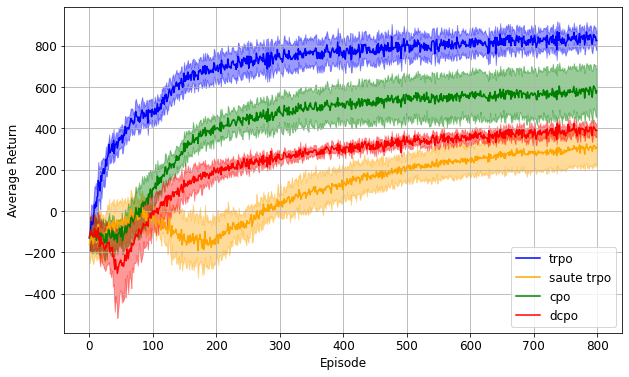

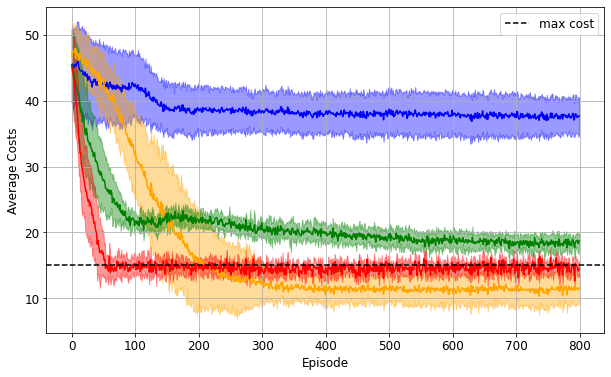

In [5]:
#eval
eval_fdirs = ['trpo_backlog', 'saute_trpo_backlog', 'cpo_backlog', 'dcpo_beta100.0_backlog']
eval_dirs = ['experiments/data' + str(i) for i in range(1, 11)]

eval_exp = {'fdir': eval_fdirs, 'data_dir': eval_dirs}
plotter = RLPlotter(**eval_exp, savefig=False)
plotter.plot_returns(figsize=(10,6), fontsize=12)
plotter.plot_costs(cost_lim=15, use_legend=False, figsize=(10,6), fontsize=12)

In [6]:
#check the average final training costs for all experiments
for k, v in plotter.data.items():
    print(k)
    print(v['Evaluation/AverageSafetyReturn'][-1])
    print('\n')

trpo_backlog
37.688572


saute_trpo_backlog
11.582857


cpo_backlog
18.719997


dcpo_beta100.0_backlog
14.537145




## Seed Evaluation

/Users/jaimesabal/opt/anaconda3/envs/thesis/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


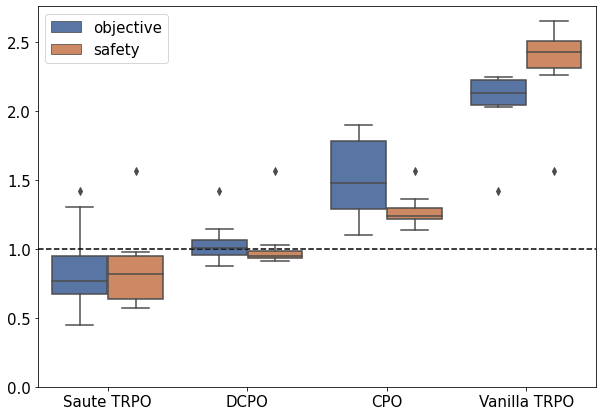

In [2]:
plotter = RLPlotter(data_dir='experiments/data1/')
exps = ['saute_trpo_backlog', 'cpo_backlog', 'dcpo_beta100.0_backlog', 'trpo_backlog']
labels = ['Saute TRPO', 'CPO', 'DCPO', 'Vanilla TRPO']
plotter.plot_evaluation(seed_dir='experiments', experiments=exps, labels=labels, fontsize=15)

In [ ]:
#snapshot_dirs = [f'experiments/data{i}/dcpo_N=1000_backlog' for i in range(1,6)]
#for snapshot in snapshot_dirs:
#    evaluator = Evaluator(snapshot, override=True)
#    epochs = evaluator.rollout(n_epochs=30)

<Figure size 720x576 with 0 Axes>

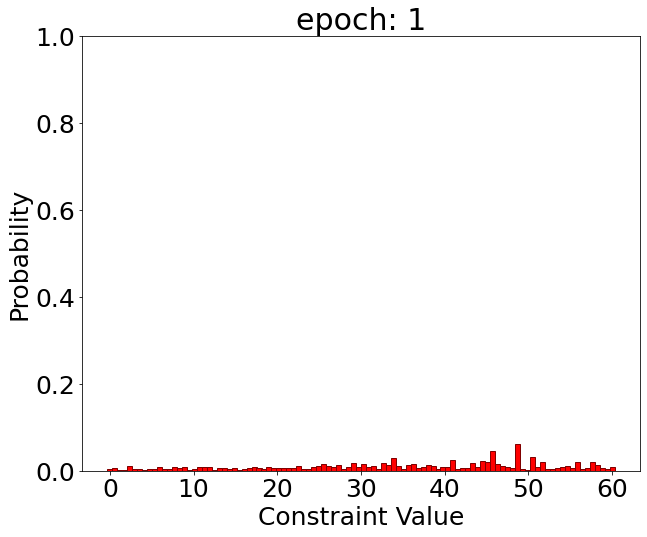

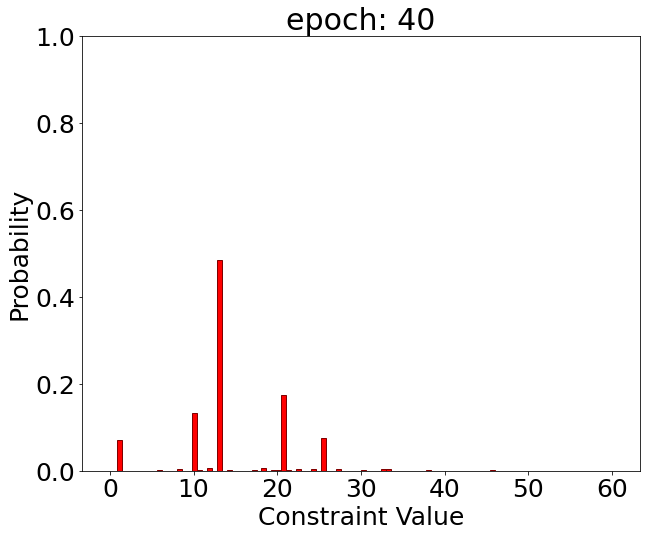

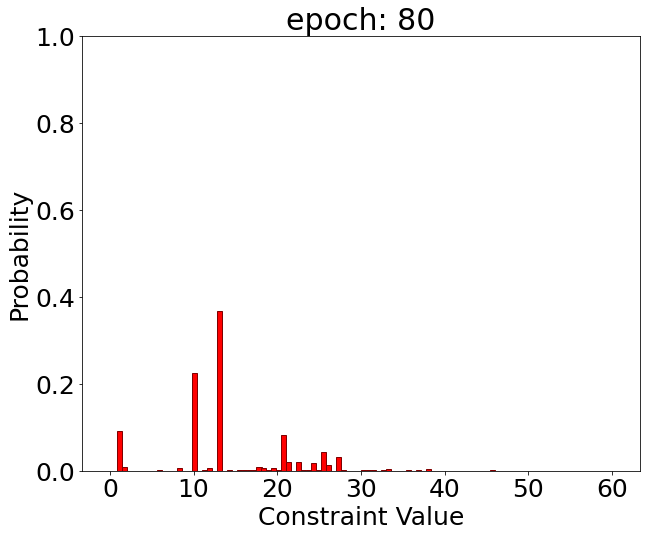

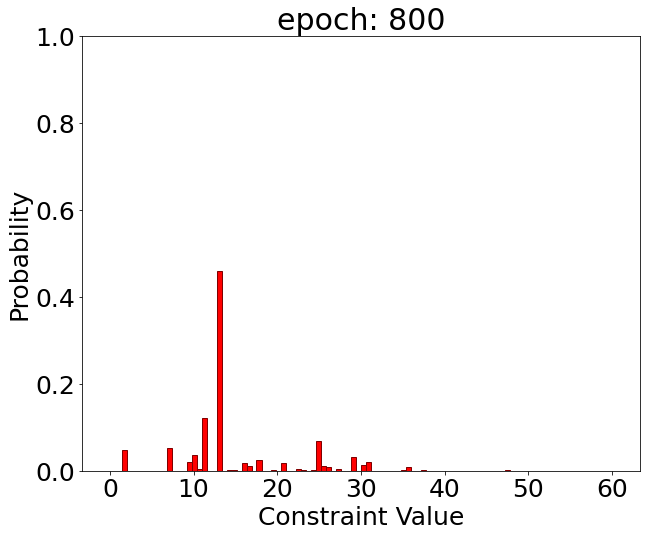

In [7]:
plotter = RLPlotter(fdir='dcpo_beta100.0_backlog', data_dir='experiments/data1')
training_steps = [0, 39, 79, 799]
plotter.plot_quantiles_progression(Vmin=0, Vmax=60, metric='safety', fontsize=25,
                                   figsize=(10,8), training_steps=training_steps)